**Table of contents**<a id='toc0_'></a>    
- [Projekat 2 - nenadgledano učenje](#toc1_)    
  - [Učitavanje _dataset_-a](#toc1_1_)    
  - [Deskriptivna analiza](#toc1_2_)    
  - [Preprocesiranje podataka](#toc1_3_)    
    - [Izbacivanje duplikata](#toc1_3_1_)    
    - [Enkodiranje kategoričkih vrednosti](#toc1_3_2_)    
    - [Izbacivanje nepotrebnih kolona](#toc1_3_3_)    
  - [Klasterizacija](#toc1_4_)    
    - [Skaliranje podataka](#toc1_4_1_)    
      - [_StandardScaler_](#toc1_4_1_1_)    
      - [_MinMaxScaler_](#toc1_4_1_2_)    
      - [_RobustScaler_](#toc1_4_1_3_)    
      - [TODO pitati profesora sta da radimo sa pred ratings](#toc1_4_1_4_)    
      - [TODO sta da radimo sa kontrolnim vrednostima (all, default)](#toc1_4_1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Projekat 2 - nenadgledano učenje](#toc0_)

**Dataset**: https://www.kaggle.com/datasets/arslanali4343/top-personality-dataset

**Definicija problema**: Klasterizacija osoba po tipovima ličnosti.

**Vrsta problema**: klasterizacija

U ovom projektu biće isprobana klasterizacija ispitanih osoba u 4 klastera na osnovu metrika njihovih ličnosti.

Klasteri predstavljaju 4 temperamenta koje osoba može da ima: sangvinik, kolerik, melanholik ili flegmatik.

Metrika ličnosti je OCEAN model koji opisuje ličnost pomoću 5 skala:
- _**O**penness_ - otvorenost osobe ka novim iskustvima
- _**C**onscientiousness_ - savesnost osobe
- _**E**xtraversion_ - stepen ekstraverzije osobe
- _**A**greeableness_ - sklonost osobe da prioritizuje harmoniju u društvu
- _**N**euroticism_ - podložnost osobe negativnim osećanjima

Cilj projekta je da se ovaj model ličnosti "pretopi" u model sa temperamentima:

![temp.png](temp.png)

## <a id='toc1_1_'></a>[Učitavanje _dataset_-a](#toc0_)

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import io

sns.set(style="darkgrid")

personality_data = pd.read_csv("dataset/2018-personality-data.csv", sep=',')
movie_ratings = pd.read_csv("dataset/2018_ratings.csv",sep=",")

personality_data.head(10)

userid   openness   agreeableness  \
0  8e7cebf9a234c064b75016249f2ac65e        5.0             2.0   
1  77c7d756a093150d4377720abeaeef76        7.0             4.0   
2  b7e8a92987a530cc368719a0e60e26a3        4.0             3.0   
3  92561f21446e017dd6b68b94b23ad5b7        5.5             5.5   
4  030001ac2145a938b07e686a35a2d638        5.5             5.5   
5  f91b2fb085d0feb47b86fc81b10207ee        6.0             3.0   
6  f7b0502be8c86203ce6acaffe59f993a        4.5             4.0   
7  36f31ef9879b4de96977aeba94878581        5.5             4.5   
8  653bb2f69ddd19e1cf1f9e1871916d71        5.0             5.0   
9  89d365a0d0f1a80ae8d079079a078155        6.0             6.5   

    emotional_stability   conscientiousness   extraversion  assigned metric  \
0                   3.0                 2.5            6.5      serendipity   
1                   6.0                 5.5            4.0              all   
2                   4.5                 2.0            2.5      serendipity   
3                   4.0                 4.5            4.0       popularity   
4                   3.5                 4.5            2.5       popularity   
5                   4.0                 3.5            1.5       popularity   
6                   6.0                 5.0            4.0        diversity   
7                   6.0                 3.0            4.0       popularity   
8                   5.0                 5.0            3.0        diversity   
9                   2.0                 2.5            3.0        diversity   

   assigned condition   movie_1   predicted_rating_1  ...   movie_9  \
0                high     77658             4.410466  ...    120138   
1             default     94959             4.207280  ...     56782   
2              medium    110501             4.868064  ...      2288   
3              medium      2905             4.526371  ...      3030   
4              medium      2905             4.526371  ...      3030   
5              medium      2905             4.526371  ...      3030   
6                 low      1289             4.221673  ...      1248   
7                 low    109243             4.300146  ...    116897   
8                high     91658             5.021285  ...      1035   
9                high     91658             5.021285  ...      1035   

    predicted_rating_9   movie_10   predicted_rating_10   movie_11  \
0             4.244817     121372              4.396004     127152   
1             4.019599       5618              3.963953        969   
2             4.823212       3307              4.676756       1172   
3             4.425689       1281              4.479921        940   
4             4.425689       1281              4.479921        940   
5             4.425689       1281              4.479921        940   
6             4.164153       1212              4.153351       2360   
7             4.101134     117444              4.138054     117192   
8             4.710799     104241              4.587644      30749   
9             4.710799     104241              4.587644      30749   

    predicted_rating_11   movie_12   predicted_rating_12   is_personalized  \
0              4.120456      95311              4.053847                 4   
1              4.174188       1232              4.334877                 2   
2              4.649281       1212              4.744990                 2   
3              4.355061        905              4.317927                 3   
4              4.355061        905              4.317927                 2   
5              4.355061        905              4.317927                 2   
6              4.206983       5291              4.157934                 3   
7              4.164289     117533              4.231472                 4   
8              4.870536       4886              4.622648                 3   
9              4.870536       4886              4.622648                 3   

    enjoy_watching  

In [6]:
personality_data = personality_data.rename(columns={' openness' : 'openness',
                ' agreeableness' : 'agreeableness',
                ' emotional_stability' : 'emotional_stability',
                ' conscientiousness' : 'conscientiousness',
                ' extraversion' : 'extraversion',
                ' assigned metric' : 'assigned metric',
                ' assigned condition' : 'assigned condition',
                ' movie_1' : 'movie_1',
                ' movie_2' : 'movie_2',  
                ' movie_3' : 'movie_3',  
                ' movie_4' : 'movie_4',  
                ' movie_5' : 'movie_5',  
                ' movie_6' : 'movie_6',  
                ' movie_7' : 'movie_7',  
                ' movie_8' : 'movie_8',  
                ' movie_9' : 'movie_9',  
                ' movie_10' : 'movie_10',
                ' movie_11' : 'movie_11',      
                ' movie_12' : 'movie_12',
                ' predicted_rating_1' : 'predicted_rating_1',
                ' predicted_rating_2' : 'predicted_rating_2',
                ' predicted_rating_3' : 'predicted_rating_3',
                ' predicted_rating_4' : 'predicted_rating_4',
                ' predicted_rating_5' : 'predicted_rating_5',
                ' predicted_rating_6' : 'predicted_rating_6',
                ' predicted_rating_7' : 'predicted_rating_7',
                ' predicted_rating_8' : 'predicted_rating_8',
                ' predicted_rating_9' : 'predicted_rating_9',
                ' predicted_rating_10' : 'predicted_rating_10',
                ' predicted_rating_11' : 'predicted_rating_11',
                ' predicted_rating_12' : 'predicted_rating_12',
                ' is_personalized' : 'is_personalized',
                ' enjoy_watching ' : 'enjoy_watching'})

In [7]:
print(personality_data['assigned metric'].unique())
print(personality_data['assigned condition'].unique())

[' serendipity' ' all' ' popularity' ' diversity']
[' high' ' default' ' medium' ' low']


In [8]:
movie_ratings.head(10)

useri   movie_id   rating                tstamp 
0  8e7cebf9a234c064b75016249f2ac65e          1      5.0   2001-09-10 17:19:56 
1  8e7cebf9a234c064b75016249f2ac65e          2      4.0   2001-09-28 11:34:55 
2  8e7cebf9a234c064b75016249f2ac65e          3      4.0   2001-09-28 11:42:50 
3  8e7cebf9a234c064b75016249f2ac65e          5      5.0   2001-09-28 11:27:30 
4  8e7cebf9a234c064b75016249f2ac65e          6      4.0   2002-01-07 18:12:02 
5  8e7cebf9a234c064b75016249f2ac65e          7      4.0   2001-09-21 14:09:24 
6  8e7cebf9a234c064b75016249f2ac65e         10      4.0   2001-09-29 18:13:15 
7  8e7cebf9a234c064b75016249f2ac65e         11      4.0   2001-09-21 11:54:21 
8  8e7cebf9a234c064b75016249f2ac65e         12      4.0   2001-09-29 18:58:15 
9  8e7cebf9a234c064b75016249f2ac65e         13      4.0   2001-09-14 15:29:46

## <a id='toc1_2_'></a>[Deskriptivna analiza](#toc0_)

In [9]:
personality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userid               1834 non-null   object 
 1   openness             1834 non-null   float64
 2   agreeableness        1834 non-null   float64
 3   emotional_stability  1834 non-null   float64
 4   conscientiousness    1834 non-null   float64
 5   extraversion         1834 non-null   float64
 6   assigned metric      1834 non-null   object 
 7   assigned condition   1834 non-null   object 
 8   movie_1              1834 non-null   int64  
 9   predicted_rating_1   1834 non-null   float64
 10  movie_2              1834 non-null   int64  
 11  predicted_rating_2   1834 non-null   float64
 12  movie_3              1834 non-null   int64  
 13  predicted_rating_3   1834 non-null   float64
 14  movie_4              1834 non-null   int64  
 15  predicted_rating_4   1834 non-null   f

In [10]:
personality_data.describe()

openness  agreeableness  emotional_stability  conscientiousness  \
count  1834.000000    1834.000000          1834.000000        1834.000000   
mean      5.376499       4.215921             4.561614           4.662486   
std       1.042804       1.137923             1.392548           1.311450   
min       1.000000       1.000000             1.000000           1.000000   
25%       4.500000       3.500000             3.500000           4.000000   
50%       5.500000       4.000000             4.500000           4.500000   
75%       6.000000       5.000000             5.500000           5.500000   
max       7.000000       7.000000             7.000000           7.000000   

       extraversion        movie_1  predicted_rating_1        movie_2  \
count   1834.000000    1834.000000         1834.000000    1834.000000   
mean       3.485551   45669.233915            4.362927   50656.360414   
std        1.468503   46612.744107            0.383549   46669.152356   
min        1.000000       6.000000            2.510682       1.000000   
25%        2.500000    2019.000000            4.110614    3307.750000   
50%        3.500000   17392.000000            4.355815   44377.000000   
75%        4.500000   94466.000000            4.618449   96606.000000   
max        7.000000  140737.000000            6.563889  136445.000000   

       predicted_rating_2        movie_3  ...        movie_9  \
count         1834.000000    1834.000000  ...    1834.000000   
mean             4.322496   51791.061069  ...   39458.009269   
std              0.378746   46172.769718  ...   44511.776921   
min              2.423497       6.000000  ...       1.000000   
25%              4.084125    3031.250000  ...    1766.750000   
50%              4.320721   48780.000000  ...    7156.000000   
75%              4.556173   95311.000000  ...   84847.000000   
max              6.585588  141761.000000  ...  140359.000000   

       predicted_rating_9       movie_10  predicted_rating_10       movie_11  \
count         1834.000000    1834.000000          1834.000000    1834.000000   
mean             4.302993   38493.352236             4.301880   39280.998909   
std              0.380281   43444.149855             0.383848   43446.111523   
min              2.483215       1.000000             2.799538       1.000000   
25%              4.049153    1302.000000             4.059146    1466.000000   
50%              4.307194    6964.000000             4.294702    7505.000000   
75%              4.545671   81847.000000             4.539686   81845.000000   
max              6.606617  134853.000000             7.345432  142115.000000   

       predicted_rating_11       movie_12  predicted_rating_12  \
count          1834.000000    1834.000000          1834.000000   
mean              4.300609   38871.924755             4.302449   
std               0.378476   43486.579385             0.378439   
min               2.375510       1.000000             2.313341   
25%               4.052558    1256.000000             4.050181   
50%               4.299400    7361.000000             4.305078   
75%               4.549493   82069.000000             4.550886   
max               6.530355  139195.000000             6.574597   

       is_personalized  enjoy_watching  
count      1834.000000     1834.000000  
mean          3.056707        3.517993  
std           1.078507        1.059060  
min           1.000000        1.000000  
25%           2.000000        3.000000  
50%           3.000000        4.000000  
75%           4.000000        4.000000  
max           5.000000        5.000000  

[8 rows x 31 columns]

In [11]:
personality_data.isnull().sum()

userid                 0
openness               0
agreeableness          0
emotional_stability    0
conscientiousness      0
extraversion           0
assigned metric        0
assigned condition     0
movie_1                0
predicted_rating_1     0
movie_2                0
predicted_rating_2     0
movie_3                0
predicted_rating_3     0
movie_4                0
predicted_rating_4     0
movie_5                0
predicted_rating_5     0
movie_6                0
predicted_rating_6     0
movie_7                0
predicted_rating_7     0
movie_8                0
predicted_rating_8     0
movie_9                0
predicted_rating_9     0
movie_10               0
predicted_rating_10    0
movie_11               0
predicted_rating_11    0
movie_12               0
predicted_rating_12    0
is_personalized        0
enjoy_watching         0
dtype: int64

Ne postoje nedostajuće vrednosti.

In [12]:
duplicated = personality_data.duplicated()
personality_data[duplicated]

userid  openness  agreeableness  \
137   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
138   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
139   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
140   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
141   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
142   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
143   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
144   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
176   c56613815b9f708eb9df7eb6afd42a49       6.0            3.5   
271   9ba0ccf0a69ae15c85d1b289baa4d494       5.0            6.5   
1327  3e0c0afd46ee7366f328ddf1dae83479       5.0            4.0   
1464  5e82ce34f999ec0dbd2859b8b04dfcbf       6.0            1.5   
1719  01e4e18e2e21b84ee1c5813fd5d3797f       6.5            4.5   

      emotional_stability  conscientiousness  extraversion assigned metric  \
137                   4.5                4.5           4.5             all   
138                   4.5                4.5           4.5             all   
139                   4.5                4.5           4.5             all   
140                   4.5                4.5           4.5             all   
141                   4.5                4.5           4.5             all   
142                   4.5                4.5           4.5             all   
143                   4.5                4.5           4.5             all   
144                   4.5                4.5           4.5             all   
176                   4.0                3.0           2.5       diversity   
271                   4.0                4.0           2.5       diversity   
1327                  5.0                5.5           4.5     serendipity   
1464                  4.0                5.5           2.5     serendipity   
1719                  3.0                4.5           5.5      popularity   

     assigned condition  movie_1  predicted_rating_1  ...  movie_9  \
137             default     4011            4.295280  ...     7502   
138             default     4011            4.295280  ...     7502   
139             default     4011            4.295280  ...     7502   
140             default     4011            4.295280  ...     7502   
141             default     4011            4.295280  ...     7502   
142             default     4011            4.295280  ...     7502   
143             default     4011            4.295280  ...     7502   
144             default     4011            4.295280  ...     7502   
176                high     2959            4.252748  ...    92259   
271                 low     1372            4.307665  ...     2012   
1327               high     7502            4.688622  ...     5110   
1464               high    77658            3.976500  ...     1207   
1719             medium    45517            4.029183  ...    70286   

      predicted_rating_9  movie_10  predicted_rating_10  movie_11  \
137             3.937361       750             3.926115       527   
138             3.937361       750             3.926115       527   
139             3.937361       750             3.926115       527   
140             3.937361       750             3.926115       527   
141             3.937361       750             3.926115       527   
142             3.937361       750             3.926115       527   
143             3.937361       750             3.926115       527   
144             3.937361       750             3.926115       527   
176             4.207883      2329             4.183084      2019   
271             4.843246      1302             4.694285     78499   
1327            4.790768      4246             4.489180      8807   
1464            3.877050      7700             3.852503       246   
1719            4.481479     68954             4.295337     50872   

      predicted_rating_11  movie_12  predicted_ratin

Postoje duplikati u podacima, što treba rešiti u koraku prečišćavanja podataka.

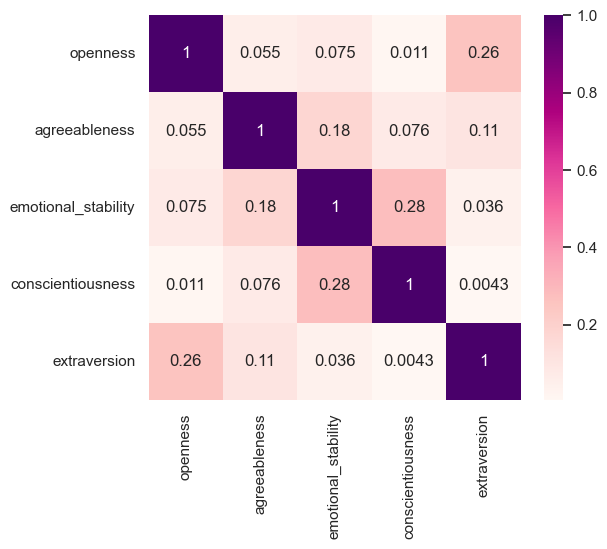

In [13]:
ocean = ['openness','agreeableness','emotional_stability','conscientiousness','extraversion']
cor_ocean = personality_data[ocean].corr()
plt.rcParams['figure.figsize']=(6,5)
sns.heatmap(cor_ocean,annot=True, cmap=plt.cm.RdPu)
plt.show()

Na osnovu matrice korelacije zaključuje se da u okviru OCEAN metrika ličnosti ne postoje značajne korelacije između vrednosti, što ima smisla obzirom da je ovo psihološki model ličnosti koji meri različite aspekte ličnosti.

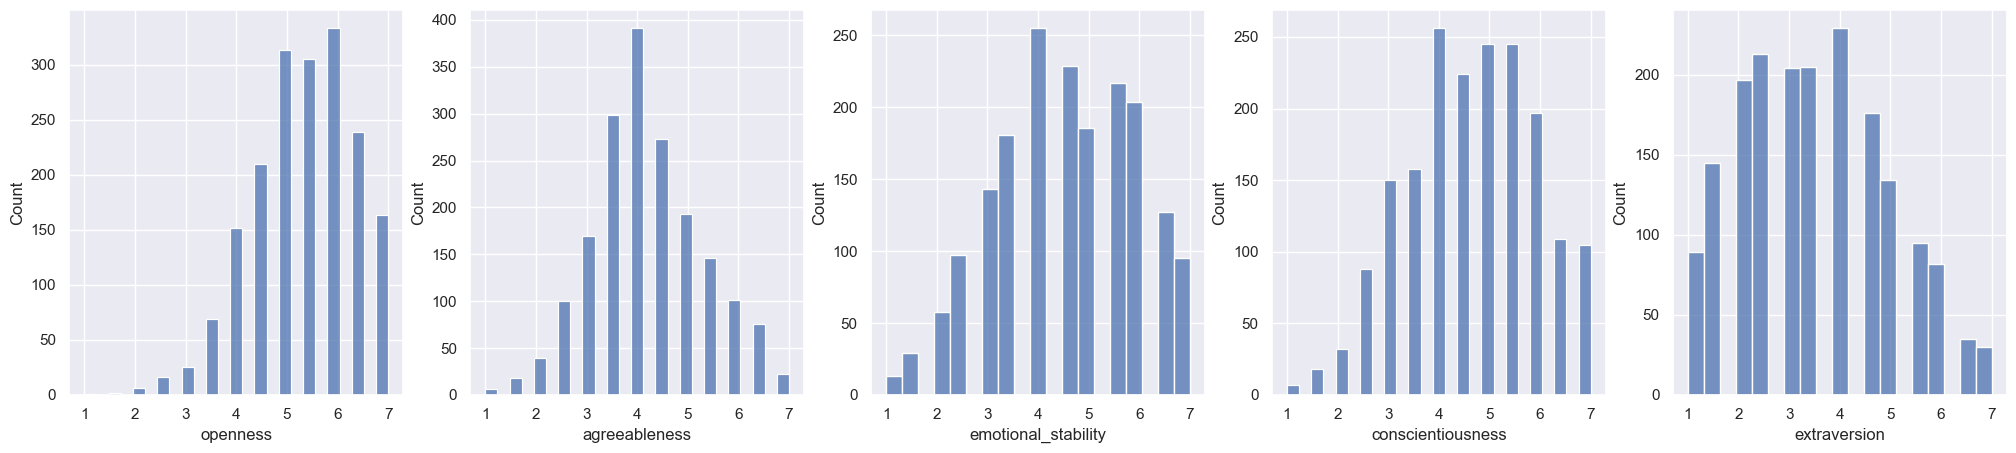

In [14]:
fig, axes = plt.subplots(1,5, figsize=(25,5))
sns.histplot(personality_data,x='openness',ax=axes[0])
sns.histplot(personality_data,x='agreeableness',ax=axes[1])
sns.histplot(personality_data,x='emotional_stability',ax=axes[2])
sns.histplot(personality_data,x='conscientiousness',ax=axes[3])
sns.histplot(personality_data,x='extraversion',ax=axes[4])
plt.show()

Na osnovu prethodnih histograma zaključuje se da raspodela podataka u okviru OCEAN atributa približno odgovara normalnoj raspodeli podataka, što je i očekivano.

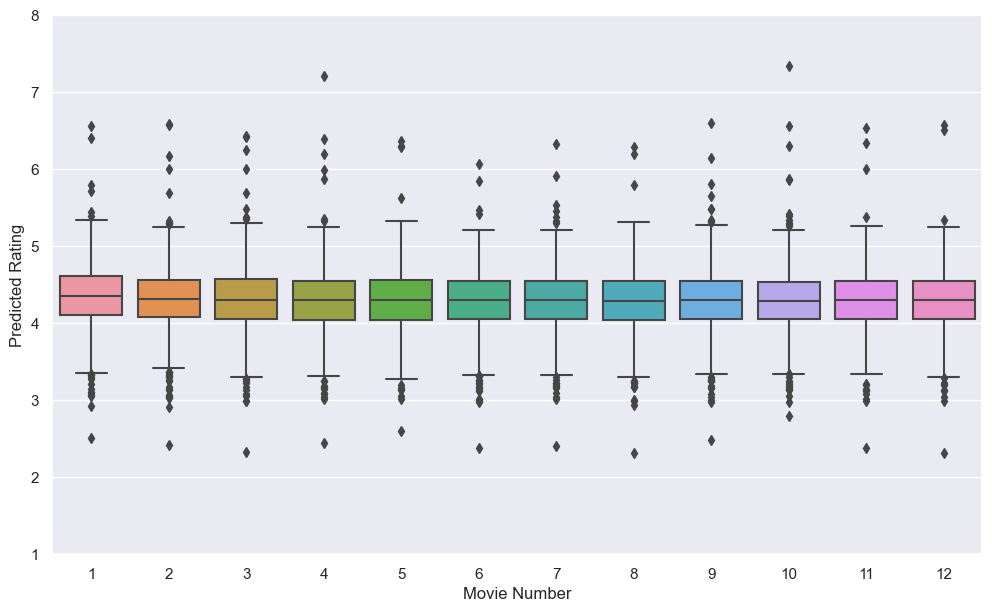

In [15]:
pred_ratings=[]
movies=[]
nums=[]
for x in range (1,13):
    pred_ratings.append(f"predicted_rating_{x}")
    movies.append(f"movie_{x}")
    nums.append(f"{x}")
plt.subplots(figsize=(12,7))
ax = sns.boxplot(data=personality_data[pred_ratings])
ax.set_xticklabels(nums)
ax.set_xlabel("Movie Number")
ax.set_ylabel("Predicted Rating")
ax.set(ylim=(1,8))
plt.show()

Prikazani su _boxplot_ grafici za predviđene ocene filmova. Može se zaključiti da su ove vrednosti pune _outlier_-a, tako da ih treba na neki način obraditi u preprocesiranju podataka.

In [16]:
print(personality_data['assigned metric'].value_counts())
print(personality_data['assigned condition'].value_counts())

 popularity     574
 serendipity    532
 diversity      520
 all            208
Name: assigned metric, dtype: int64
 high       554
 medium     538
 low        534
 default    208
Name: assigned condition, dtype: int64


Budući da su _assigned metric_ i _assigned condition_ kategoričke vrednosti, provereno je koje vrednosti se nalaze u _dataset_-u i koliko ih ima. Za _assigned metric_, pogodno je kodirati je u _one-hot_ formatu, dok _assigned condition_ poseduje određenu hijerarhiju tako da će biti kodiran u _label encoding_-u.

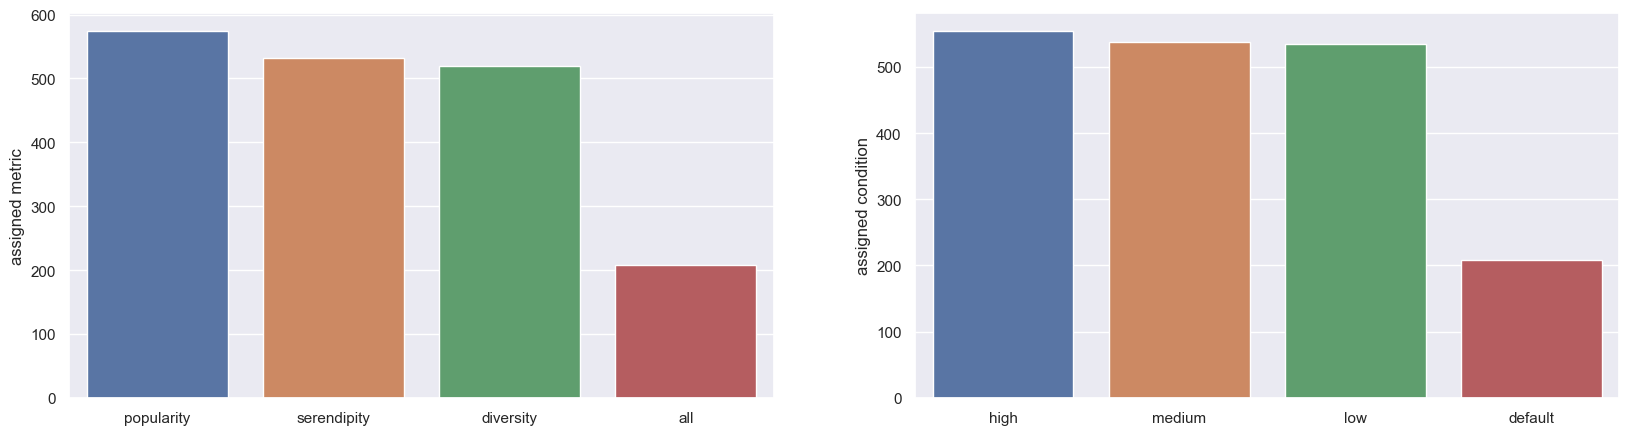

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(data=personality_data,x=['popularity','serendipity','diversity','all'],y=personality_data['assigned metric'].value_counts(),ax=axes[0])
sns.barplot(data=personality_data,x=['high','medium','low','default'],y=personality_data['assigned condition'].value_counts(),ax=axes[1])
plt.show()

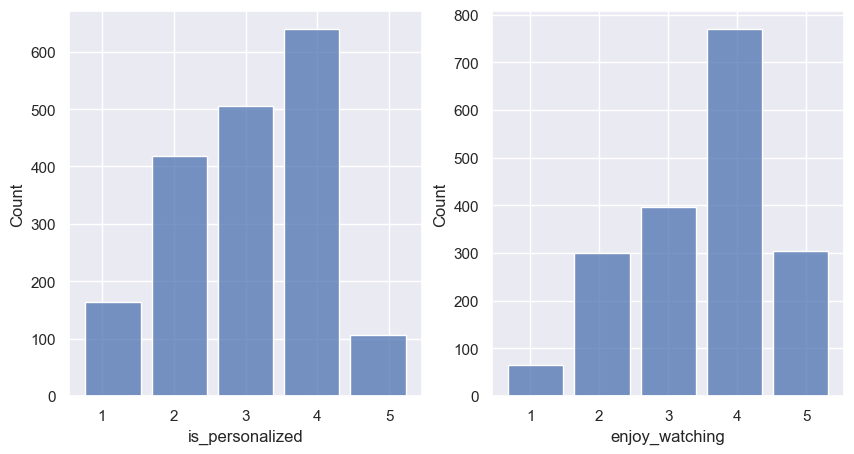

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.histplot(personality_data,x='is_personalized',ax=axes[0],shrink=2.5)
sns.histplot(personality_data,x='enjoy_watching',ax=axes[1],shrink=5)
plt.show()

In [19]:
len(personality_data.loc[personality_data['assigned metric'] == ' all'].loc[personality_data['assigned condition']==' default'])

208

Postoji 208 kontrolnih uzoraka kojima je svima zajedničko da imaju:
- _assigned metric = "all"_
- _assigned condition = "default"_

Treba razmotriti da li korišćenje ovih uzoraka doprinosi ili šteti klasterizaciji.

In [ ]:
movie_ratings.describe()

movie_id        rating
count  1.028751e+06  1.028751e+06
mean   4.083825e+04  3.370212e+00
std    4.844535e+04  1.010081e+00
min    1.000000e+00  5.000000e-01
25%    2.628000e+03  3.000000e+00
50%    7.361000e+03  3.500000e+00
75%    7.475400e+04  4.000000e+00
max    1.981170e+05  5.000000e+00

In [23]:
movie_ratings.isnull().sum()

useri        0
 movie_id    0
 rating      0
 tstamp      0
dtype: int64

In [20]:
duplicated_ratings = movie_ratings.duplicated()
movie_ratings[duplicated_ratings]
len(movie_ratings[duplicated_ratings])

8322

Kod *dataset*-a *movie_ratings* takođe postoje duplikati koje treba izbaciti.

## <a id='toc1_3_'></a>[Preprocesiranje podataka](#toc0_)

### <a id='toc1_3_1_'></a>[Izbacivanje duplikata](#toc0_)

In [138]:
personality_data = personality_data.drop_duplicates()
len(personality_data)

1821

In [139]:
personality_data['userid'].nunique()

1820

Izbačeni su duplikati, ali postoji jedan korisnik koji je dva puta radio istu anketu, stoga će jedan njegov uzorak biti izbačen.

In [140]:
personality_data = personality_data.drop_duplicates(subset=['userid'])

In [141]:
movie_ratings = movie_ratings.drop_duplicates()

In [142]:
personality_data['assigned personality'] = personality_data['assigned metric'] + personality_data['assigned condition']

Radi lakšeg rada sa podacima, *assigned metric* i *assigned condition* su kombinovani u jedan atribut kako bi se lakše analizirala klasterizacija.

### <a id='toc1_3_2_'></a>[Enkodiranje kategoričkih vrednosti](#toc0_)

In [143]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed =  ohe.fit_transform(personality_data[['assigned metric']])
print(transformed.toarray())

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [144]:
personality_data[ohe.categories_[0]] =transformed.toarray()
personality_data.head()

userid  openness  agreeableness  \
0  8e7cebf9a234c064b75016249f2ac65e       5.0            2.0   
1  77c7d756a093150d4377720abeaeef76       7.0            4.0   
2  b7e8a92987a530cc368719a0e60e26a3       4.0            3.0   
3  92561f21446e017dd6b68b94b23ad5b7       5.5            5.5   
4  030001ac2145a938b07e686a35a2d638       5.5            5.5   

   emotional_stability  conscientiousness  extraversion assigned metric  \
0                  3.0                2.5           6.5     serendipity   
1                  6.0                5.5           4.0             all   
2                  4.5                2.0           2.5     serendipity   
3                  4.0                4.5           4.0      popularity   
4                  3.5                4.5           2.5      popularity   

  assigned condition  movie_1  predicted_rating_1  ...  predicted_rating_11  \
0               high    77658            4.410466  ...             4.120456   
1            default    94959            4.207280  ...             4.174188   
2             medium   110501            4.868064  ...             4.649281   
3             medium     2905            4.526371  ...             4.355061   
4             medium     2905            4.526371  ...             4.355061   

   movie_12  predicted_rating_12  is_personalized  enjoy_watching  \
0     95311             4.053847                4               4   
1      1232             4.334877                2               3   
2      1212             4.744990                2               2   
3       905             4.317927                3               3   
4       905             4.317927                2               3   

   assigned personality   all   diversity   popularity   serendipity  
0      serendipity high   0.0         0.0          0.0           1.0  
1           all default   1.0         0.0          0.0           0.0  
2    serendipity medium   0.0         0.0          0.0           1.0  
3     popularity medium   0.0         0.0          1.0           0.0  
4     popularity medium   0.0         0.0          1.0           0.0  

[5 rows x 39 columns]

In [145]:
from sklearn.preprocessing import OrdinalEncoder

scale_mapper = {
    ' low':0,
    ' medium':1,
    ' high':2,
    ' default':3
}

personality_data['assigned condition'] = personality_data['assigned condition'].replace(scale_mapper)
personality_data.head()

userid  openness  agreeableness  \
0  8e7cebf9a234c064b75016249f2ac65e       5.0            2.0   
1  77c7d756a093150d4377720abeaeef76       7.0            4.0   
2  b7e8a92987a530cc368719a0e60e26a3       4.0            3.0   
3  92561f21446e017dd6b68b94b23ad5b7       5.5            5.5   
4  030001ac2145a938b07e686a35a2d638       5.5            5.5   

   emotional_stability  conscientiousness  extraversion assigned metric  \
0                  3.0                2.5           6.5     serendipity   
1                  6.0                5.5           4.0             all   
2                  4.5                2.0           2.5     serendipity   
3                  4.0                4.5           4.0      popularity   
4                  3.5                4.5           2.5      popularity   

   assigned condition  movie_1  predicted_rating_1  ...  predicted_rating_11  \
0                   2    77658            4.410466  ...             4.120456   
1                   3    94959            4.207280  ...             4.174188   
2                   1   110501            4.868064  ...             4.649281   
3                   1     2905            4.526371  ...             4.355061   
4                   1     2905            4.526371  ...             4.355061   

   movie_12  predicted_rating_12  is_personalized  enjoy_watching  \
0     95311             4.053847                4               4   
1      1232             4.334877                2               3   
2      1212             4.744990                2               2   
3       905             4.317927                3               3   
4       905             4.317927                2               3   

   assigned personality   all   diversity   popularity   serendipity  
0      serendipity high   0.0         0.0          0.0           1.0  
1           all default   1.0         0.0          0.0           0.0  
2    serendipity medium   0.0         0.0          0.0           1.0  
3     popularity medium   0.0         0.0          1.0           0.0  
4     popularity medium   0.0         0.0          1.0           0.0  

[5 rows x 39 columns]

Cilj je izvršiti uniju dva *dataset*-a preko *userid* atributa tako što se u *movie_ratings* *dataset*-u izvrši sračunavanje srednje ocene filmova za datog korisnika i pomoću operacije unije za svakog korisnika u *personality_data* pridruži odgovarajuća vrednost.

In [146]:
movie_ratings = movie_ratings.drop(' movie_id',axis=1)
movie_mean = movie_ratings.groupby('useri').mean('rating').reset_index()

In [147]:
movie_mean = movie_mean.rename(columns={'useri':'userid',' rating':'rating'})

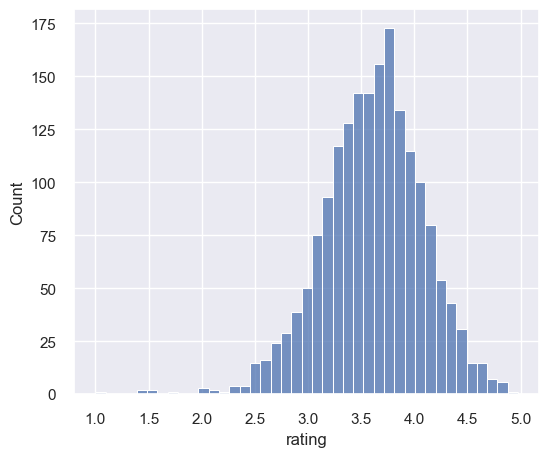

In [148]:
sns.histplot(movie_mean,x='rating')
plt.show()

Sa grafika se može videti raspodela srednjih ocena filmova, gde je najviše ocenjeno u rasponu 3.5-4.

In [149]:
pdNew= pd.merge(personality_data,movie_mean,on='userid',how='outer')
pdNew.head()

userid  openness  agreeableness  \
0  8e7cebf9a234c064b75016249f2ac65e       5.0            2.0   
1  77c7d756a093150d4377720abeaeef76       7.0            4.0   
2  b7e8a92987a530cc368719a0e60e26a3       4.0            3.0   
3  92561f21446e017dd6b68b94b23ad5b7       5.5            5.5   
4  030001ac2145a938b07e686a35a2d638       5.5            5.5   

   emotional_stability  conscientiousness  extraversion assigned metric  \
0                  3.0                2.5           6.5     serendipity   
1                  6.0                5.5           4.0             all   
2                  4.5                2.0           2.5     serendipity   
3                  4.0                4.5           4.0      popularity   
4                  3.5                4.5           2.5      popularity   

   assigned condition  movie_1  predicted_rating_1  ...  movie_12  \
0                   2    77658            4.410466  ...     95311   
1                   3    94959            4.207280  ...      1232   
2                   1   110501            4.868064  ...      1212   
3                   1     2905            4.526371  ...       905   
4                   1     2905            4.526371  ...       905   

   predicted_rating_12  is_personalized  enjoy_watching  assigned personality  \
0             4.053847                4               4      serendipity high   
1             4.334877                2               3           all default   
2             4.744990                2               2    serendipity medium   
3             4.317927                3               3     popularity medium   
4             4.317927                2               3     popularity medium   

    all   diversity   popularity   serendipity    rating  
0   0.0         0.0          0.0           1.0  3.482708  
1   1.0         0.0          0.0           0.0  2.673100  
2   0.0         0.0          0.0           1.0  3.125821  
3   0.0         0.0          1.0           0.0  3.521717  
4   0.0         0.0          1.0           0.0  3.188734  

[5 rows x 40 columns]

In [150]:
pdNew.isnull().sum()

userid                  0
openness                0
agreeableness           0
emotional_stability     0
conscientiousness       0
extraversion            0
assigned metric         0
assigned condition      0
movie_1                 0
predicted_rating_1      0
movie_2                 0
predicted_rating_2      0
movie_3                 0
predicted_rating_3      0
movie_4                 0
predicted_rating_4      0
movie_5                 0
predicted_rating_5      0
movie_6                 0
predicted_rating_6      0
movie_7                 0
predicted_rating_7      0
movie_8                 0
predicted_rating_8      0
movie_9                 0
predicted_rating_9      0
movie_10                0
predicted_rating_10     0
movie_11                0
predicted_rating_11     0
movie_12                0
predicted_rating_12     0
is_personalized         0
enjoy_watching          0
assigned personality    0
 all                    0
 diversity              0
 popularity             0
 serendipity

In [151]:
personality_data = pdNew

Izvršena je finalna provera da li postoje *null* vrednosti u konačnom *dataset*-u. Pošto ih nema, ovaj *dataset* će biti korišćen nadalje u projektu.

### <a id='toc1_3_3_'></a>[Izbacivanje nepotrebnih kolona](#toc0_)

In [152]:
colsToRemove = ["userid","assigned metric",'assigned personality'] + movies+ pred_ratings
cols = [col for col in personality_data.columns if col not in colsToRemove]

Izbacuju se kolone sa ID-jem osoba i kolone vezane za filmove i njihove predviđene ocene. Kolona _assigned metric_ se izbacuje iz razloga što je enkodovana u _one-hot_ formatu koji je konkateniran na ceo _dataset_.

In [153]:
#indexDrop = personality_data[ (personality_data['assigned metric'] == ' all') ].index
#personality_data.drop(indexDrop,inplace=True)
#personality_data.head(15)

## <a id='toc1_4_'></a>[Klasterizacija](#toc0_)

Ideja je klasterizovati sve ispitane osobe u 4 klastera koji odgovaraju temperamentima koje ljudi mogu da imaju.

Isproban je _KMeans_ algoritam za klasterizaciju na minimalno preprocesiranim podacima (nisu skalirani). Iscrtani su 2D i 3D grafici klasterizacije i određen je _silhouette score_.

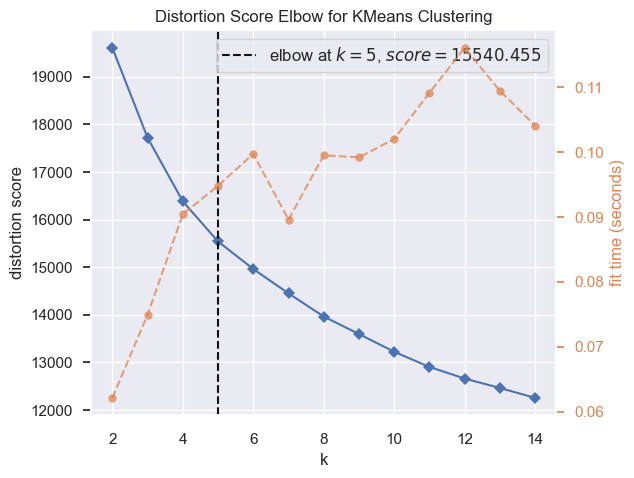

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [154]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler


kmeans = KMeans(n_init=10,random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(personality_data[cols])
visualizer.poof()

Pomoću *KElbowVisualizer*-a određen je optimalni broj klastera u skupu podataka. Algoritam je procenio da se najbolja klasterizacija može dobiti za 5 klastera. 

Za potrebe projekta, predviđeno je 4 klastera, što će najpre i biti isprobano. Nakon toga, isprobaće se i klasterizacija sa 5 klastera kako bi se uporedili rezultati i ispitala mogućnost graničnih podataka ili *outlier*-a.

In [155]:
k = 4

kmeans = KMeans(n_clusters=k,n_init=10)

kmeans.fit(personality_data[cols])

labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



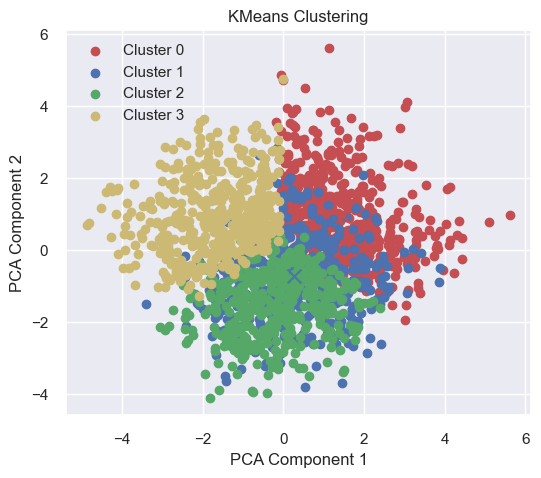

In [156]:
def generate2DGraph(data,cluster_centers,labels):
    pca = decomposition.PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    cluster_centers_pca = pca.transform(cluster_centers)

    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'w', 'purple', 'orange', 'gray', 'pink', 'brown', 'olive', 'cyan', 'magenta']
    for i in range(k):
        cluster = data_pca[labels == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label='Cluster {}'.format(i))

    for i in range(k):
        plt.scatter(cluster_centers_pca[i, 0], cluster_centers_pca[i, 1], c=colors[i], marker='x', s=100)

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('KMeans Clustering')

    plt.legend()

    plt.show()
generate2DGraph(personality_data[cols],cluster_centers,labels)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



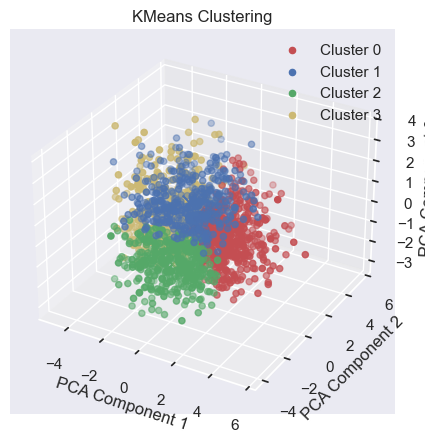

In [157]:
def generate3DGraph(data,cluster_centers,labels):
    pca = decomposition.PCA(n_components=3)
    data_pca = pca.fit_transform(data)
    cluster_centers_pca = pca.transform(cluster_centers)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'w', 'purple', 'orange', 'gray', 'pink', 'brown', 'olive', 'cyan', 'magenta']
    for i in range(k):
        cluster = data_pca[labels == i]
        ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], c=colors[i], label='Cluster {}'.format(i))

    for i in range(k):
        ax.scatter(cluster_centers_pca[i, 0], cluster_centers_pca[i, 1], cluster_centers_pca[i, 2], c=colors[i], marker='x', s=100)

    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.title('KMeans Clustering')

    ax.legend()

    plt.show()

generate3DGraph(personality_data[cols],cluster_centers,labels)

In [158]:
import plotly.express as px

def generateInteractive3DGraph(data,labels):
    pca = decomposition.PCA(n_components=3)
    data_pca = pca.fit_transform(data)
    df = pd.DataFrame(data_pca, columns=['PC1','PC2','PC3'])
    #allData = personality_data.copy(deep=True)
    #allData['PC1'] = df.PC1
    #allData['PC2'] = df.PC2
    #allData['PC3'] = df.PC3
    #allData['cluster'] = labels
    df['cluster'] = labels
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                color='cluster',title="KMeans Clustering")
    fig.show()
generateInteractive3DGraph(personality_data[cols],labels)

In [159]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score


def printScore(data,labels):
    print("Silhouette score: ",silhouette_score(data,labels))
    print("Calinski-Harabas score: ",calinski_harabasz_score(data,labels))
    print("Davies-Bouldin score: ",davies_bouldin_score(data,labels))

printScore(personality_data[cols],labels)

Silhouette score:  0.11332400333909727
Calinski-Harabas score:  231.44842710242085
Davies-Bouldin score:  1.9895329528393764


In [160]:
def clusterValues(labels):
    data_sums = pd.DataFrame()
    data_sums['extroversion'] = personality_data['extraversion']
    data_sums['emotional_stability'] = personality_data['emotional_stability']
    data_sums['agreeable'] = personality_data['agreeableness']
    data_sums['conscientious'] = personality_data['conscientiousness']
    data_sums['open'] = personality_data['openness']
    data_sums['isPersonalized'] = personality_data.is_personalized
    data_sums['enjoyWatching'] = personality_data.enjoy_watching
    data_sums['avgRating'] = personality_data['rating']
    data_sums['cluster'] = labels
    print(data_sums.groupby('cluster').mean())
clusterValues(labels=labels)

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.365949             3.196673   3.819961       3.694716   
1            3.110329             4.542254   4.039906       4.870892   
2            2.302784             5.440835   4.387471       5.220418   
3            5.080752             5.294248   4.663717       5.034292   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.403131        3.416830       3.886497   3.592106  
1        5.064554        1.812207       2.276995   3.489399  
2        5.081206        3.668213       4.062645   3.600469  
3        5.907080        3.241150       3.780973   3.740028  


In [161]:
def exportPersonalityTypesByCluster(labels,fileName):
    allData = personality_data.copy(deep=True)
    allData['cluster'] = labels
    clustersPersonality = allData.groupby('cluster')['assigned personality'].value_counts()
    with io.open(f'evaluation/{fileName}.txt','w',encoding='utf-8') as f: f.write(str(clustersPersonality))
exportPersonalityTypesByCluster(labels,"4_clusters_nonScaled")   

In [162]:
def evaluateKMeans(n_clusters,fileName,data,pca=None,scaler=None,shouldGenerate2DGraph=False,shouldGenerate3DGraph=False):
    new_data = data.copy(deep=True)
    if(scaler is not None):
        new_data = scaler.fit_transform(data)
    if(pca is not None):
        new_data = pca.fit_transform(new_data)

    kmeans = KMeans(n_clusters=n_clusters,n_init=10,random_state=42)

    kmeans.fit(new_data)

    labels = kmeans.labels_

    cluster_centers = kmeans.cluster_centers_

    if(shouldGenerate2DGraph):
        generate2DGraph(new_data,cluster_centers,labels)
    if(shouldGenerate3DGraph):
        generate3DGraph(new_data,cluster_centers,labels)
    generateInteractive3DGraph(new_data,labels)

    printScore(new_data,labels)
    clusterValues(labels)
    if(fileName is not None):
        exportPersonalityTypesByCluster(labels,fileName)
    return labels

Bez skaliranja podataka, sa izbačenim kolonama za filmove dobija se _silhouette score_ od 0.1133, što nije najbolji rezultat.

Klasteri koji se dobijaju ne odgovaraju kategorijama ličnosti koje su cilj ovog projekta.

U daljem radu biće isprobani _StandardScaler_, _MinMaxScaler_ i _RobustScaler_.

In [163]:
evaluateKMeans(5,"5_clusters_nonScaled",personality_data[cols])

Silhouette score:  0.10410739928851195
Calinski-Harabas score:  207.4694869125704
Davies-Bouldin score:  2.0873489492385966
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.310345             3.209770   3.714080       3.818966   
1            3.263228             4.760582   4.092593       5.007937   
2            4.715517             3.574713   4.050287       3.853448   
3            4.988473             5.626801   4.778098       5.309798   
4            2.317043             5.497494   4.423559       5.220551   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.170977        3.201149       3.689655   3.529051  
1        5.138889        1.788360       2.185185   3.492616  
2        5.600575        3.336207       3.864943   3.681020  
3        5.958213        3.317003       3.847262   3.736033  

array([2, 3, 0, ..., 2, 0, 1])

Isprobana je i klasterizacija neskaliranih podataka u 5 klastera, čime se ne dobijaju kategorije ličnosti na koje ciljamo, a *silhouette score* je manji u odnosu na onaj sa 4 klastera (0.1041 sa 5 klastera, a bio je 0.1133 sa 4 klastera).

### <a id='toc1_4_1_'></a>[Skaliranje podataka](#toc0_)

#### <a id='toc1_4_1_1_'></a>[_StandardScaler_](#toc0_)

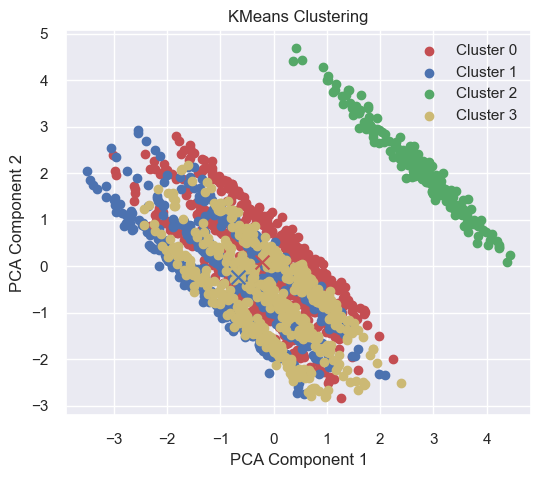

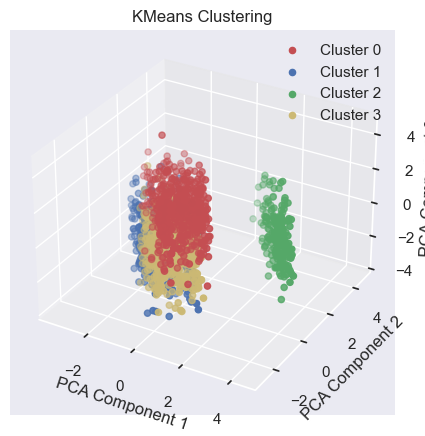

Silhouette score:  0.22742548507200144
Calinski-Harabas score:  312.071713253666
Davies-Bouldin score:  1.7057630872137022
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.498110             4.525520   4.077505       4.615312   
1            3.534031             4.534904   4.279232       4.582024   
2            3.492500             4.582500   4.217500       4.727500   
3            3.397683             4.628378   4.284749       4.779923   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.332703        3.034026       3.527410   3.598189  
1        5.402269        2.970332       3.455497   3.592790  
2        5.442500        3.310000       3.640000   3.612469  
3        5.354247        3.079151       3.555985   3.628842  


In [164]:
from sklearn.preprocessing import StandardScaler

labels_scaled = evaluateKMeans(4,None,personality_data[cols],None,StandardScaler(),True,True)

Primenom _StandardScaler_-a dobija se bolji _silhouette score_ (0.2274 u odnosu na 0.1133 sa neskaliranim podacima), bolji _Calinski-Harabas score_(312 u odnosu na 231) i manji _Davies-Bouldin score_ (1.7 u odnosu na skoro 2).

Sa druge strane, klasteri koji se dobijaju ne odgovaraju kategorijama koje tražimo za rešavanje zadatog problema.

#### <a id='toc1_4_1_2_'></a>[_MinMaxScaler_](#toc0_)

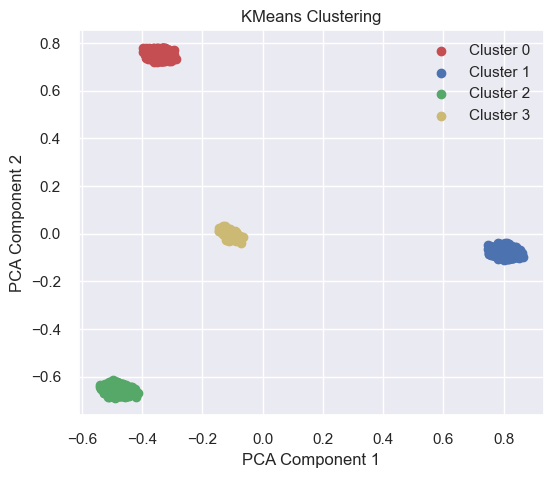

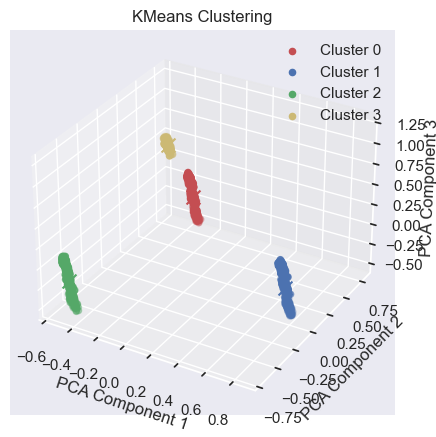

Silhouette score:  0.4632023223544628
Calinski-Harabas score:  1033.0754315367892
Davies-Bouldin score:  0.9017076744295012
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.397683             4.628378   4.284749       4.779923   
1            3.534031             4.534904   4.279232       4.582024   
2            3.498110             4.525520   4.077505       4.615312   
3            3.492500             4.582500   4.217500       4.727500   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.354247        3.079151       3.555985   3.628842  
1        5.402269        2.970332       3.455497   3.592790  
2        5.332703        3.034026       3.527410   3.598189  
3        5.442500        3.310000       3.640000   3.612469  


In [165]:
from sklearn.preprocessing import MinMaxScaler

labels_min_max = evaluateKMeans(4,None,personality_data[cols],None,MinMaxScaler(feature_range=(0,1)),True,True)

Primenom _MinMaxScaler_-a dobija se znatno bolji _silhouette score_ (0.4632), znatno veći _Calinski-Harabas score_ (1033), i manji _Davies-Bouldin score_ (0.9).

Međutim, dobijeni klasteri ponovo ne odgovaraju onim kategorijama koje su potrebne.

#### <a id='toc1_4_1_3_'></a>[_RobustScaler_](#toc0_)

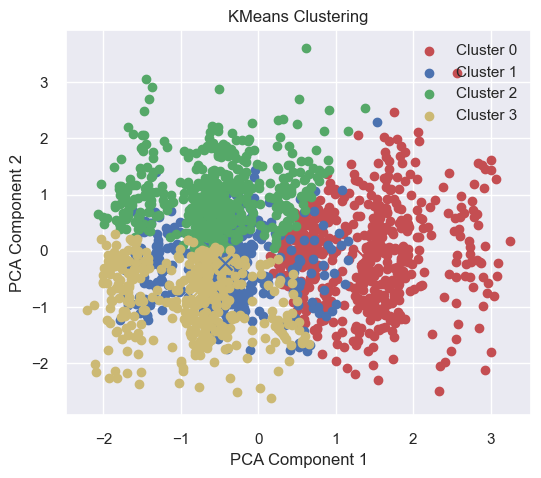

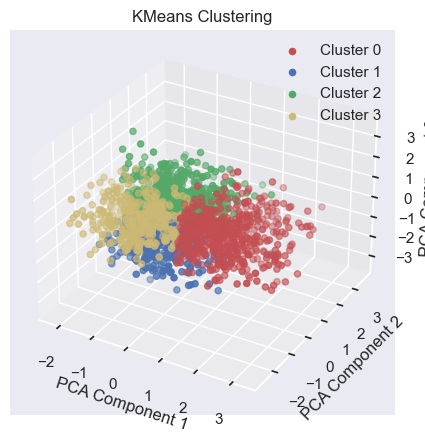

Silhouette score:  0.09927411408668735
Calinski-Harabas score:  218.68438674713002
Davies-Bouldin score:  2.2567287309209902
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.440072             4.610018   4.189624       4.814848   
1            2.521795             4.860256   3.812821       5.546154   
2            3.470650             3.663522   3.925577       3.292453   
3            4.497462             5.295685   5.001269       5.237310   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.249553        2.066190       2.254025   3.503099  
1        4.974359        3.605128       4.082051   3.433987  
2        5.407757        3.387841       4.018868   3.648421  
3        5.899746        3.520305       4.180203   3.874520  


array([2, 0, 0, ..., 2, 2, 0])

In [166]:
from sklearn.preprocessing import RobustScaler

evaluateKMeans(4,None,personality_data[cols],None,RobustScaler(),True,True)

Primenom _RobustScaler_-a dobija se najgori _silhouette score_ (0.0993), gori _Calinski-Harabas score_ (218), i najveći _Davies-Bouldin score_ (2.26).

Dobijeni klasteri takođe ne odgovaraju traženim kategorijama.

Na grafovima koji koriste skalirane podatke može se primetiti određeni patern grupisanja podatka. Klasteri se ne određuju po tipu ličnosti već po nekom drugom parametru. Vredi pogledati broj uzoraka u svakom klasteru.

In [167]:
df = personality_data.copy(deep=True)
df['cluster'] = labels_min_max
print(df['cluster'].value_counts())

1    573
2    529
0    518
3    200
Name: cluster, dtype: int64


In [168]:
df = personality_data.copy(deep=True)
df['cluster'] = labels_scaled
print(df['cluster'].value_counts())

1    573
0    529
3    518
2    200
Name: cluster, dtype: int64


Može se videti da brojevi uzoraka u klasteru odgovaraju broju uzoraka po _assigned metric_ atributu. Ovo govori da taj atribut previše utiče na rezultat klasterizacije. Vredi probati klasterizaciju bez tog atributa.

In [169]:
for x in [' serendipity',
    ' popularity',
    ' diversity',
    ' all']:
    if x in cols:
        cols.remove(x)

In [170]:
evaluateKMeans(4,None,personality_data[cols],None,StandardScaler())

Silhouette score:  0.10080500669583292
Calinski-Harabas score:  208.0526248981755
Davies-Bouldin score:  2.1979747073839433
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.390688             4.585020   4.133603       4.840081   
1            2.402123             4.983491   4.133255       5.165094   
2            4.545767             5.454233   4.866133       5.178490   
3            3.556989             3.322581   3.765591       3.536559   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.223684        1.825911       2.244939   3.465209  
1        4.672170        3.625000       4.073113   3.514733  
2        5.995423        3.521739       4.011442   3.826848  
3        5.584946        3.410753       3.929032   3.634306  


array([3, 0, 0, ..., 3, 3, 0])

Nakon uklanjanja _assigned metric_ atributa iregularnost klastera se smanjila, ali i dalje se moze uočiti. Pokušaćemo da uklonimo i _assigned condition_ atribut. 

In [171]:
if 'assigned condition' in cols:
    cols.remove('assigned condition')

In [172]:
evaluateKMeans(4,"4_clusters_scaled",personality_data[cols],None,StandardScaler())

Silhouette score:  0.11542867846682513
Calinski-Harabas score:  243.611748440259
Davies-Bouldin score:  2.014773943177046
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.638761             3.301606   3.792431       3.493119   
1            3.363636             4.566667   4.129293       4.819192   
2            4.529478             5.469388   4.877551       5.185941   
3            2.421875             4.898438   4.070312       5.118304   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.629587        3.389908       3.924312   3.644067  
1        5.200000        1.824242       2.246465   3.467372  
2        6.004535        3.510204       3.988662   3.825449  
3        4.691964        3.649554       4.093750   3.509284  


array([0, 1, 1, ..., 0, 0, 1])

Sa izbačenim atributima koji doprinose lošoj klasterizaciji, dobijaju se malo raznovrsniji klasteri, ali to ponovo nije ono što tražimo. Rezultati evaluacije su takođe niži od očekivanih.

In [174]:
evaluateKMeans(4,"4_clusters_pcaCols",personality_data[cols],decomposition.PCA(n_components=3),StandardScaler())

Silhouette score:  0.24835524355557242
Calinski-Harabas score:  650.3321526724021
Davies-Bouldin score:  1.1596422785166531
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.378000             4.578000   4.129000       4.814000   
1            4.544811             5.437500   4.895047       5.188679   
2            2.429039             4.947598   4.136463       5.129913   
3            3.665525             3.301370   3.738584       3.497717   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.205000        1.836000       2.260000   3.449302  
1        6.031840        3.490566       3.990566   3.852523  
2        4.746725        3.665939       4.089520   3.525534  
3        5.581050        3.394977       3.929224   3.633628  


array([3, 0, 0, ..., 3, 3, 0])

Sa redukcijom dimenzionalnosti pomoću PCA algoritma, dobijaju se bolji rezultati evaluacije (*silhouette score* od 0.2483). 

Sa druge strane, klasteri ponovo nisu definisani na način koji je nama potreban.

In [175]:
evaluateKMeans(5,"5_clusters_pcaCols",personality_data[cols],decomposition.PCA(n_components=3),StandardScaler())

Silhouette score:  0.2467567440733113
Calinski-Harabas score:  633.7670314584165
Davies-Bouldin score:  1.1777414991399622
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            4.304918             5.203279   4.685246       5.242623   
1            2.438424             5.115764   4.206897       5.247537   
2            4.478006             5.357771   4.834311       5.048387   
3            3.617381             3.314898   3.746050       3.555305   
4            2.773846             4.144615   3.775385       4.500000   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.852459        2.003279       2.586885   3.685889  
1        4.778325        3.697044       4.118227   3.530969  
2        6.064516        3.785924       4.240469   3.887263  
3        5.522573        3.460497       3.963883   3.626228  


array([3, 0, 4, ..., 3, 3, 0])

Kada probamo klasterizaciju sa 5 klastera u cilju posmatranja ponašanja algoritma, dobija se sličan rezultat *silhouette score*-a.

Što se klastera tiče, ponovo se ne mogu uočiti potrebne pravilnosti u okviru raspodele atributa. Jedna stvar koju treba istaknuti jeste klaster 5 koji sadrži osobe koje su smatrale da njihova lista filmova nije personalizovana i da da generalno nisu uživali gledajući te filmove.

##### OCEAN podaci

In [176]:
evaluateKMeans(4,"4_clusters_pcaOCEAN",personality_data[ocean],decomposition.PCA(n_components=3),StandardScaler())

Silhouette score:  0.23862215023628644
Calinski-Harabas score:  608.7672729849822
Davies-Bouldin score:  1.2279926351840222
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            4.296296             3.612200   3.893246       3.649237   
1            3.238255             5.257271   3.484340       5.704698   
2            2.411885             3.963115   4.048156       4.209016   
3            4.078638             5.550469   5.521127       5.186620   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.920479        3.058824       3.638344   3.629244  
1        5.634228        3.062640       3.469799   3.575308  
2        4.322746        3.018443       3.424180   3.551627  
3        5.711268        3.093897       3.577465   3.678791  


array([0, 1, 2, ..., 0, 2, 3])

Radi eksperimentisanja, pokušana je klasterizacija sa isključivo OCEAN podacima, u 4 klastera. Dobija se relativno dobar *silhouette score* (0.2386).

Što se tiče klastera, može se primetiti sledeće:
- **klaster 0**: sadrži osobe koje su visoko ekstravertne i manje emotivno stabilne (kolerik)
- **klaster 1**: sadrži osobe koje su nisko ekstravertne i više emotivno stabilne (flegmatik)
- **klaster 2**: sadrži osobe koje su nisko ekstravertne i manje emotivno stabilne (melanholik)
- **klaster 3**: sadrži osobe koje su visoko ekstravertne i više emotivno stabilne (sangvinik)

Ovakva klasterizacija odgovara tipovima ličnosti koje želimo da izdvojimo. Sa druge strane, ovom klasterizacijom se ne dobijaju nikakve informacije o tome kakve filmove koji klaster preferira. Nastavljamo sa analizom.

In [177]:
evaluateKMeans(5,"5_clusters_pcaOCEAN",personality_data[ocean],decomposition.PCA(n_components=3),StandardScaler())

Silhouette score:  0.23518714224491008
Calinski-Harabas score:  596.6669119638515
Davies-Bouldin score:  1.1608192839481029
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.601220             3.470732   3.492683       3.858537   
1            3.343511             5.248092   3.409669       5.689567   
2            4.486936             3.836105   4.238717       3.712589   
3            2.361465             5.106688   5.011146       5.063694   
4            4.691489             5.682624   5.468085       5.381206   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        4.703659        3.048780       3.456098   3.509661  
1        5.717557        3.025445       3.475827   3.584334  
2        5.944181        3.052257       3.596200   3.660929  
3        4.442675        3.098726       3.550955   3.611851  

array([2, 1, 0, ..., 2, 0, 4])

Budući da je *KElbowVisualizer* metoda predložila da broj klastera bude 5, izvršena je klasterizacija u 5 klastera nad OCEAN podacima. Rezultati evaluacije koji se dobijaju su neznatno gori u odnosu na 4 klastera.

Ponovo se među klasterima mogu uočiti potrebne 4 kategorije ličnosti, ali postoji jedan klaster koji nikako ne definiše ličnost - u njemu se sadrže podaci sa relativno prosečnim vrednostima u okviru dataseta (to je klaster 2).

#### *Meanshift*

In [809]:
from sklearn.cluster import MeanShift, estimate_bandwidth


bandwidth = estimate_bandwidth(personality_data[cols], quantile=0.2, n_samples=100)

meanshift = MeanShift(n_jobs=-1,bandwidth=bandwidth, bin_seeding=True)

meanshift.fit(personality_data[cols])

MSlabels = meanshift.labels_

MScluster_centers = meanshift.cluster_centers_

In [810]:
labels_unique = np.unique(MSlabels)
n_clusters_ = len(labels_unique)
n_clusters_

1

Algoritam *Meanshift* kao idealan broj klastera daje 1. Budući da su podaci zgusnuti u oblak u prostoru vektora, ovo je i očekivano. *Meanshift* nije pogodan algoritam za ovakvu raspodelu podataka.

#### DBSCAN

In [811]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(n_jobs=-1)

dbscan.fit(personality_data[cols])

DBSCAN_labels = meanshift.labels_

DBSCAN_cluster_centers = meanshift.cluster_centers_

In [812]:
labels_unique = np.unique(DBSCAN_labels)
n_clusters_ = len(labels_unique)
n_clusters_

1

Dobijaju se isti rezultati kao i za *Meanshift*.

#### *AgglomerativeClustering*

In [813]:
from sklearn.cluster import AgglomerativeClustering

def evaluateModel(cluster,fileName,data):
    scaler = StandardScaler()
    features_std = scaler.fit_transform(data)

    pca = decomposition.PCA(n_components=3)
    pcaData = pca.fit_transform(features_std)

    model = cluster.fit(pcaData)

    model_labels = cluster.labels_

    clusterValues(model_labels)
    printScore(pcaData,model_labels)
    exportPersonalityTypesByCluster(model_labels,fileName)
evaluateModel(AgglomerativeClustering(n_clusters=4),"4_clusters_pcaCols_AC",personality_data[cols])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.673142             4.694257   4.278716       4.841216   
1            2.387850             4.976636   4.141355       5.147196   
2            4.424752             4.858416   4.593069       4.690099   
3            3.061017             3.200000   3.549153       3.562712   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.409628        1.971284       2.469595   3.500688  
1        4.684579        3.647196       4.035047   3.516563  
2        5.989109        3.695050       4.168317   3.850802  
3        5.242373        3.288136       3.803390   3.532859  
Silhouette score:  0.18297126708745157
Calinski-Harabas score:  496.72758258327127
Davies-Bouldin score:  1.2529248305760263


Vršenjem *AgglomerativeClustering* nad podacima dobija se *silhouette score* koji je relativno nizak u odnosu na najbolju klasterizaciju dobijenu pomoću *KMeans* (AC daje 0.183 u odnosu na 0.2386 kod *KMeans* koji dobro definiše klastere).

Klasteri nisu lepo definisani, a takođe postoji i onaj klaster kome pripadaju osobe kojima se filmovi nisu uopšte svideli i ne smatraju da su personalizovani za njih.

In [814]:
evaluateModel(AgglomerativeClustering(n_clusters=5),"5_clusters_pcaCols_AC",personality_data[cols])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            4.029018             4.900670   4.481027       4.950893   
1            2.387850             4.976636   4.141355       5.147196   
2            4.424752             4.858416   4.593069       4.690099   
3            3.061017             3.200000   3.549153       3.562712   
4            2.565972             4.052083   3.649306       4.500000   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.706473        2.062500       2.647321   3.623542  
1        4.684579        3.647196       4.035047   3.516563  
2        5.989109        3.695050       4.168317   3.850802  
3        5.242373        3.288136       3.803390   3.532859  
4        4.486111        1.687500       1.916667   3.118476  
Silhouette score:  0.18964023718163253
Calinski-Harabas score

Izvršena je klasterizacija i sa 5 klastera, čime se dobija veoma sličan *silhouette score*. 

Klasteri ponovo nisu dobro definisani.

In [815]:
evaluateModel(AgglomerativeClustering(n_clusters=4),"4_clusters_pcaOCEAN_AC",personality_data[ocean])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.584375             4.557812   3.638281       4.994531   
1            4.195370             3.777778   3.744444       3.862963   
2            4.620521             5.754072   4.855049       5.662866   
3            2.990991             4.753754   5.498498       4.406907   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        4.735938        3.039062       3.453125   3.542706  
1        5.925926        3.072222       3.583333   3.621448  
2        6.203583        3.114007       3.579805   3.691903  
3        4.933934        3.015015       3.519520   3.627678  
Silhouette score:  0.1908201293705501
Calinski-Harabas score:  465.14829872124307
Davies-Bouldin score:  1.4057966363963819


Isproban je AC nad OCEAN podacima. Dobijen je sličan *silhouette score* kao i sa ostalim atributima. 

Klasteri nisu dobro definisani i ništa se ne može zaključiti o preferencama za filmove na osnovu pripadnosti klasteru.

In [816]:
evaluateModel(AgglomerativeClustering(n_clusters=5),"5_clusters_pcaOCEAN_AC",personality_data[ocean])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.398568             3.784010   4.081146       4.023866   
1            4.782421             5.652738   4.910663       5.453890   
2            4.058333             3.766667   3.652778       3.966667   
3            3.020833             5.375000   5.638021       5.018229   
4            2.788820             5.259317   3.736025       5.604037   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        4.329356        2.983294       3.400955   3.532235  
1        6.242075        3.109510       3.593660   3.707773  
2        5.833333        3.081481       3.605556   3.614188  
3        5.036458        3.057292       3.526042   3.618212  
4        5.222050        3.055901       3.478261   3.575723  
Silhouette score:  0.1744137508296331
Calinski-Harabas score:

Sa 5 klastera i OCEAN podacima, dobija se gori *silhouette score* (0.1744 u odnosu na score koji je uvek bio oko 0.189 za AC).

Ponovo se ništa ne može zaključiti iz klastera.

Zaključuje se da *AgglomerativeClustering* algoritam nije dobro rešenje za zadati problem.

#### *Spectral Clustering*

In [817]:
from sklearn.cluster import SpectralClustering

evaluateModel(SpectralClustering(n_clusters=4),"4_clusters_pcaCols_SC",personality_data[cols])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.145522             4.440299   3.970149       4.750000   
1            2.506224             5.129668   4.227178       5.250000   
2            4.716080             5.479899   4.987437       5.217337   
3            3.688662             3.472119   3.816914       3.665428   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.068408        1.783582       2.169154   3.373081  
1        4.815353        3.607884       4.024896   3.530112  
2        6.130653        3.208543       3.743719   3.862858  
3        5.539033        3.403346       3.929368   3.660659  
Silhouette score:  0.24257305639245144
Calinski-Harabas score:  627.3100152881775
Davies-Bouldin score:  1.1918505934769545


Za *SpectralClustering*, sa 4 klastera i PCA algoritmom, dobija se *silhouette score* od 0.2426, što nije loš rezultat. 

Sa druge strane, klasteri ne pokazuju nikakve informacije koje bi pomogle u određivanju tipova ličnosti.

In [818]:
evaluateModel(SpectralClustering(n_clusters=5),"5_clusters_pcaCols_SC",personality_data[cols])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.687874             3.631737   3.880988       3.808383   
1            2.637195             3.899390   3.539634       4.368902   
2            4.649225             5.445736   4.990310       5.114341   
3            2.558769             5.192164   4.261194       5.281716   
4            4.469072             5.427835   4.780928       5.554124   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.523204        3.160180       3.702096   3.635691  
1        4.658537        1.707317       1.932927   3.155106  
2        6.158915        3.879845       4.325581   3.923096  
3        4.815299        3.395522       3.858209   3.539660  
4        5.953608        1.814433       2.278351   3.653859  
Silhouette score:  0.21310086386084134
Calinski-Harabas score

Sa 5 klastera, dobija se niži *silhouette score*, gde klasteri ponovo ne pokazuju korisne informacije za određivanje tipova ličnosti.

In [819]:
evaluateModel(SpectralClustering(n_clusters=4),"4_clusters_pcaOCEAN_SC",personality_data[ocean])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.448211             4.011299   4.096045       4.265537   
1            4.354202             3.880789   4.096913       3.854202   
2            3.370763             5.389831   3.604873       5.772246   
3            3.865385             5.854701   6.012821       5.350427   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        4.418079        3.062147       3.467043   3.550471  
1        5.913379        3.065180       3.617496   3.647897  
2        5.682203        3.008475       3.463983   3.590314  
3        5.568376        3.123932       3.551282   3.665351  
Silhouette score:  0.23124965413316828
Calinski-Harabas score:  556.8394476689633
Davies-Bouldin score:  1.2353629388132417


Odrađen je *SpectralClustering* i sa OCEAN podacima, čime se dobija sličan *silhouette score* i klasteri koji ne daju informacije za potrebne tipove ličnosti.

In [820]:
evaluateModel(SpectralClustering(n_clusters=5),"5_clusters_pcaOCEAN_SC",personality_data[ocean])

         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            4.309836             4.012295   4.349180       3.924590   
1            3.420304             5.382353   3.715370       5.715370   
2            5.320988             6.141975   6.086420       5.555556   
3            2.495434             5.392694   5.573059       5.100457   
4            2.415144             3.509138   3.518277       3.956919   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.839344        3.049180       3.600000   3.658383  
1        5.660342        3.020873       3.472486   3.591742  
2        6.308642        3.086420       3.518519   3.716573  
3        4.543379        3.132420       3.584475   3.627145  
4        4.510444        3.070496       3.446475   3.510434  
Silhouette score:  0.21738650360898815
Calinski-Harabas score

Sa 5 klastera, dobija se niži *silhouette score*, dok klasteri delimično liče na one koji bi bili definisani tipom ličnosti:
- **klaster 0**: sadrži prosečne vrednosti svih atributa
- **klaster 1**: sadrži osobe sa nižom ekstraverzijom i višom emotivnom stabilnošću (flegmatik)
- **klaster 2**: sadrži osobe sa visokom ekstraverzijom i emotivnom stabilnošću (sangvinik)
- **klaster 3**: sadrži osobe sa niskom ekstraverzijom i visokom emotivnom stabilnošću (ponovo flegmatik)
- **klaster 4**: sadrži osobe sa niskom ekstraverzijom i emotivnom stabilnošću (melanholik)

Uočava se da kategorija kolerika nedostaje u ovoj klasterizaciji. Pored toga, nije moguće odrediti preference za filmove budući da *isPersonalized* i *enjoyWatching* za svaki klaster imaju jednako raspoređene vrednosti.

#### *GaussianMixture*

In [178]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4,covariance_type='spherical',n_init=10,random_state=42).fit(personality_data[ocean])
labels = gmm.predict(personality_data[ocean])

generateInteractive3DGraph(personality_data[ocean],labels)
printScore(personality_data[ocean],labels)
clusterValues(labels)
exportPersonalityTypesByCluster(labels,"4_clusters_OCEAN_GM")

Silhouette score:  0.15303349340711073
Calinski-Harabas score:  378.5012683733659
Davies-Bouldin score:  1.6886164625457774
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.596386             5.559380   4.337349       5.345095   
1            2.416830             3.407045   3.842466       4.003914   
2            4.804598             3.890805   4.075862       3.891954   
3            5.121160             5.607509   4.831058       5.610922   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.181583        3.094664       3.523236   3.597924  
1        5.060665        3.015656       3.448141   3.538717  
2        5.614943        3.027586       3.563218   3.637543  
3        5.936860        3.098976       3.607509   3.697388  


Budući da se OCEAN vrednosti mogu aproksimirati na normalnu raspodelu (ovo je statistički dokazano u polju psihologije), isproban je *GaussianMixture clustering* nad OCEAN podacima za 4 klastera.

*Silhouette score* koji se dobija je znantno manji u odnosu na *SpectralClustering* i iznosi 0.153. 

Informacije o dobijenim klasterima su sledeće:
- **klaster 0**: sadrži osobe koje su nisko ekstravertne i više emotivno stabilne (flegmatik)
- **klaster 1**: sadrži osobe koje su nisko ekstravertne i manje emotivno stabilne (melanholik)
- **klaster 2**: sadrži osobe koje su visoko ekstravertne i manje emotivno stabilne (kolerik)
- **klaster 3**: sadrži osobe koje su visoko ekstravertne i više emotivno stabilne (sangvinik)

Ponovo, iako su klasteri dobro definisani, ne može se zaključiti ništa o preferencama filmova svakog klastera.

In [179]:
gmm = GaussianMixture(n_components=5,covariance_type='spherical',n_init=10,random_state=42).fit(personality_data[cols])
labels = gmm.predict(personality_data[cols])

generateInteractive3DGraph(personality_data[cols],labels)
printScore(personality_data[cols],labels)
clusterValues(labels)
exportPersonalityTypesByCluster(labels,"5_clusters_Cols_GM")

Silhouette score:  0.12412561374761395
Calinski-Harabas score:  256.4446159317559
Davies-Bouldin score:  1.848333590642497
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            3.201511             4.741814   4.103275       5.006297   
1            5.117133             5.748252   4.854895       5.391608   
2            2.449412             5.495294   4.391765       5.227059   
3            4.806319             3.652473   4.074176       3.931319   
4            2.324713             3.204023   3.750000       3.754310   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.143577        1.816121       2.201511   3.495364  
1        5.963287        3.286713       3.842657   3.727043  
2        5.171765        3.696471       4.087059   3.615885  
3        5.616758        3.310440       3.846154   3.687535  


Koristeći GM nad svim korisnim atributima (a ne samo OCEAN), za 5 klastera dobija se niži *silhouette score* u odnosu na klasterizaciju OCEAN podataka u 4 klastera.

Informacije o dobijenim klasterima su sledeće:
- **klaster 0**: sadrži osobe koje su nisko ekstravertne i više emotivno stabilne (flegmatik)
- **klaster 1**: sadrži osobe koje su visoko ekstravertne i više emotivno stabilne (sangvinik)
- **klaster 2**: sadrži osobe koje su nisko ekstravertne i visše emotivno stabilne (flegmatik)
- **klaster 3**: sadrži osobe koje su visoko ekstravertne i niže emotivno stabilne (kolerik)
- **klaster 4**: sadrži osobe koje su nisko ekstravertne i niže emotivno stabilne (melanholik)

Bitno je primetiti da klaster 0 sardži podatke o osobama kojima se nijedan predloženi film nije svideo. Ova grupa bi se možda mogla zanemariti, i tako bi se dobila klasterizacija po tipovima ličnosti koji odgovaraju definiciji problema.

In [180]:
scaler = MinMaxScaler(feature_range=(0,1))
data_min = scaler.fit_transform(personality_data[ocean])

pca = decomposition.PCA(n_components=3)
pcaData = pca.fit_transform(data_min)

gmm = GaussianMixture(n_components=4,covariance_type='spherical',n_init=10,random_state=42).fit(pcaData)
labels = gmm.predict(pcaData)

generateInteractive3DGraph(pcaData,labels)
printScore(pcaData,labels)
clusterValues(labels) 
exportPersonalityTypesByCluster(labels,"4_clusters_pcaOCEAN_GM")

Silhouette score:  0.22997239278800477
Calinski-Harabas score:  639.3102588908083
Davies-Bouldin score:  1.3004370869492732
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            4.983728             3.760355   4.176036       3.803254   
1            2.471193             5.663580   4.385802       5.419753   
2            2.611987             3.581230   3.820189       4.070978   
3            4.951657             5.559392   4.715470       5.491713   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.776627        3.100592       3.680473   3.679703  
1        5.150206        3.088477       3.497942   3.587833  
2        5.056782        3.000000       3.438486   3.528037  
3        5.848066        3.074586       3.569061   3.702051  


Iskorišćen je *MinMaxScaler* nad OCEAN podacima kako bi se ujednačile vrednosti. Ideja je da ovakvo skaliranje može pomoći klasterizaciji jer su OCEAN vrednosti normalno raspodeljene. Iskorišćen je i PCA kako bi se smanjila dimenzionalnost problema.

*Silhouette score* koji se dobija je znantno veći u odnosu na klasterizaciju bez skaliranja (0.153 bez skaliranja, a sada je 0.22997). 

Informacije o dobijenim klasterima su sledeće:
- **klaster 0**: sadrži osobe koje su visoko ekstravertne i manje emotivno stabilne (kolerik)
- **klaster 1**: sadrži osobe koje su nisko ekstravertne i više emotivno stabilne (flegmatik)
- **klaster 2**: sadrži osobe koje su nisko ekstravertne i manje emotivno stabilne (melanholik)
- **klaster 3**: sadrži osobe koje su visoko ekstravertne i više emotivno stabilne (sangvinik)

Ponovo, iako su klasteri dobro definisani, ne može se zaključiti ništa o preferencama filmova svakog klastera.

In [181]:
pca = decomposition.PCA(n_components=3)
pcaData = pca.fit_transform(personality_data[cols])

gmm = GaussianMixture(n_components=5,covariance_type='spherical',n_init=10,random_state=42).fit(pcaData)
labels = gmm.predict(pcaData)

generateInteractive3DGraph(pcaData,labels)
printScore(pcaData,labels)
clusterValues(labels) 
exportPersonalityTypesByCluster(labels,"5_clusters_pcaCols_GM")

Silhouette score:  0.24016445424274888
Calinski-Harabas score:  620.895366719934
Davies-Bouldin score:  1.1400224662556193
         extroversion  emotional_stability  agreeable  conscientious  \
cluster                                                                
0            2.462396             3.284123   3.733983       3.754875   
1            5.068657             5.641791   4.831343       5.319403   
2            2.423750             5.463750   4.375000       5.280000   
3            4.862712             3.555932   4.081356       3.801695   
4            3.127610             4.647332   4.081206       4.930394   

             open  isPersonalized  enjoyWatching  avgRating  
cluster                                                      
0        5.051532        3.359331       3.832869   3.545899  
1        5.967164        3.238806       3.788060   3.729774  
2        5.177500        3.732500       4.115000   3.607674  
3        5.750847        3.345763       3.884746   3.699357  


Koristeći GM nad svim korisnim atributima (a ne samo OCEAN), za 5 klastera dobija se viši *silhouette score* u odnosu na klasterizaciju OCEAN podataka u 4 klastera (0.2402 u odnosu na 0.22997).

Informacije o dobijenim klasterima su sledeće:
- **klaster 0**: sadrži osobe koje su nisko ekstravertne i niže emotivno stabilne (melanholik)
- **klaster 1**: sadrži osobe koje su visoko ekstravertne i više emotivno stabilne (sangvinik)
- **klaster 2**: sadrži osobe koje su nisko ekstravertne i više emotivno stabilne (flegmatik)
- **klaster 3**: sadrži osobe koje su visoko ekstravertne i niže emotivno stabilne (kolerik)
- **klaster 4**: sadrži osobe koje su niže ekstravertne i osrednje emotivno stabilne (nedefinisano)

Bitno je primetiti da klaster 4 sardži podatke o osobama kojima se nijedan predloženi film nije svideo. Ova grupa ljudi ne može ni da se svrsta u neki tip ličnosti, tako da se može smatrati vrstom *outlier*-a u podacima.